In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('data/full_data_corrected_2024.pkl', 'rb') as file:
    full_data = pickle.load(file)

print(type(full_data))

<class 'dict'>


In [4]:
# Choose an index to inspect (the first sample)
i = 0

# Print out all values for that sample
for key in full_data.keys():
    value = full_data[key][i]
    print(f"{key}: {value}")

I: [-0.018 -0.021 -0.018 ...  0.036  0.03   0.024]
II: [-0.042 -0.039 -0.036 ...  0.084  0.087  0.09 ]
III: [-0.021 -0.018 -0.018 ...  0.048  0.057  0.066]
AVR: [ 0.     0.     0.    ... -0.006 -0.012 -0.018]
AVL: [ 0.03   0.03   0.03  ... -0.063 -0.06  -0.06 ]
AVF: [-0.033 -0.03  -0.027 ...  0.066  0.072  0.078]
V1: [ 0.018  0.018  0.021 ... -0.048 -0.045 -0.042]
V2: [-0.06  -0.057 -0.054 ...  0.042  0.045  0.048]
V3: [-0.06  -0.06  -0.057 ...  0.057  0.06   0.057]
V4: [-0.093 -0.09  -0.087 ...  0.168  0.168  0.171]
V5: [-0.093 -0.09  -0.09  ...  0.159  0.156  0.159]
V6: [-0.075 -0.072 -0.072 ...  0.102  0.102  0.108]
Sex: Female
HTA: nan
Age: 61.0
PVC_transition: V1
SOO_chamber: Right ventricle
Height: nan
Weight: nan
BMI: nan
DM: nan
DLP: nan
Smoker: nan
COPD: nan
Sleep_apnea: nan
CLINICAL_SCORE: nan
SOO: Unión mitroaórtica
OTorigin: 0.0


This is a full ECG record, including:
* Raw 12-lead signals, each one a NumPy array
* Patient metadata: Sex, HTA, PVC_transition, SOO_chamber, Height, Weight, BMI, DM, DLP, Smoker, COPD, Sleep_apnea, CLINICAL_SCORE, SOO, OTorigin.

In [5]:
# Get the number of samples (same for all keys)
print(len(full_data['PVC_transition']))
# Convert to a dataframe for easier manipulation

metadata_keys = ['Sex', 'HTA', 'Age', 'PVC_transition', 'SOO_chamber', 'Height', 'Weight', 'BMI', 
                 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea', 'CLINICAL_SCORE', 'SOO', 'OTorigin']

df_meta = pd.DataFrame({key: full_data[key] for key in metadata_keys})

df_meta.head(10)

181


,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin
0,Female,NaN,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0
1,Female,No,52.0,V3,RVOT,169.0,68.0,NaN,No,No,No,No,No,1.0,Pared libre anterior,1.0
2,Female,No,69.0,V3,LVOT,156.0,70.0,NaN,No,Yes,No,No,No,1.0,RCC,1.0
3,Female,No,66.0,V4,Right ventricle,176.0,63.0,20.338326,No,No,No,No,No,1.0,M. papilar posteromedial,0.0
4,Female,Yes,46.0,V3,RVOT,160.0,79.0,30.859375,No,No,No,No,No,1.0,RVOT septal,1.0
5,Male,No,84.0,V3,LVOT,179.0,97.0,30.273712,No,No,No,Yes,No,2.0,Seno de Valsalva izdo.,1.0
6,Male,Yes,74.0,V2,LVOT,167.0,89.0,31.912223,No,Yes,No,No,No,3.0,Intersenos dcho.-izdo.,1.0
7,Male,Yes,72.0,V2,LVOT,NaN,NaN,NaN,No,Yes,No,No,No,3.0,LVOT intersenos dcho.-izdo.,1.0
8,Female,Yes,62.0,V3,RVOT,152.0,62.0,26.835180,No,No,No,No,No,2.0,RVOT posterolateral,1.0
9,Female,No,36.0,V3,RVOT,159.0,80.0,NaN,No,No,No,No,No,0.0,RVOT,1.0


In [6]:
print(df_meta['SOO_chamber'].unique())

['Right ventricle' 'RVOT' 'LVOT' 'Coronary sinus' 'Tricuspid annulus'
 'Left ventricle' 'Mitral annulus']


In [7]:
# Build multi-lead ECG array
ecg_leads = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
n_samples = len(full_data['I'])
signal_length = len(full_data['I'][0])  # assuming all leads same length

multi_lead_ecgs = np.zeros((n_samples, len(ecg_leads), signal_length))
for i, lead in enumerate(ecg_leads):
    for j in range(n_samples):
        multi_lead_ecgs[j, i, :] = full_data[lead][j]

# Check the shape of the multi-lead ECG array
print(multi_lead_ecgs.shape)  # should be (n_samples, ecg_leads, signal_length)

(181, 12, 2500)


Hence, there are:
* 181 ECG samples
* 12 leads per sample
* 2500 time points per lead

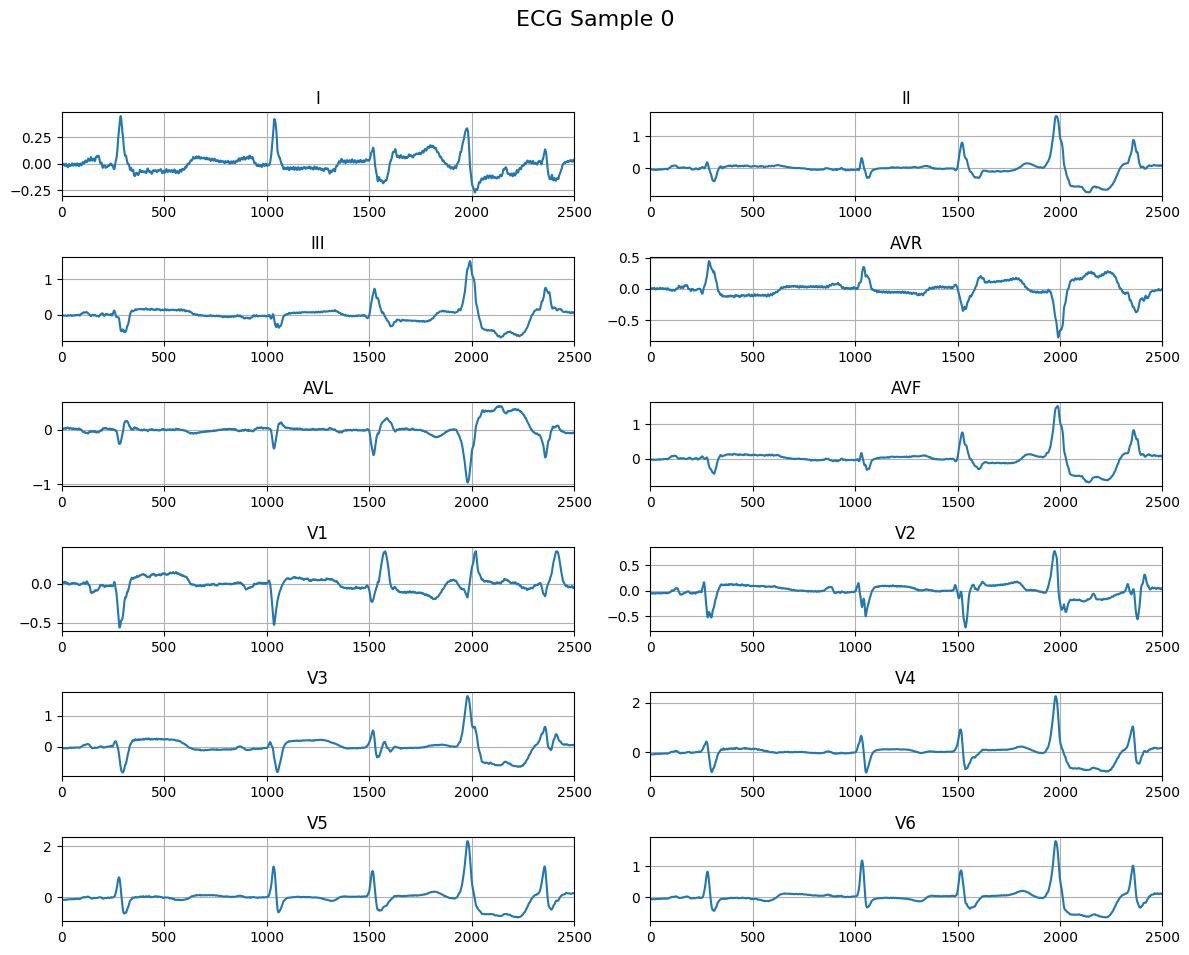

In [8]:
# Visualize the first ECG sample (12 leads)
sample_idx = 0
fig, axs = plt.subplots(6, 2, figsize=(12, 10))
fig.suptitle(f'ECG Sample {sample_idx}', fontsize=16)

for i, ax in enumerate(axs.flat):
    ax.plot(multi_lead_ecgs[sample_idx, i])
    ax.set_title(ecg_leads[i])
    ax.set_xlim([0, signal_length])
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
import scipy.signal as sp
from scipy.interpolate import interp1d

# Processes one sample ECG with all 12 leads
def preprocess_ecg_signal(ecg_signals, fs=1000, target_fs=250, high=0.5, low=100.0):
    """
    Preprocess a multi-lead ECG signal [timepoints, leads]:
    - Resample to target_fs
    - Bandpass filter between `high` and `low`
    """
    timepoints = ecg_signals.shape[0] # Initially, 2500
    new_timepoints = int(timepoints * target_fs / fs) # 625
    
    # Resample each lead using interpolation
    ecg_resampled = np.zeros((new_timepoints, ecg_signals.shape[1]))
    for lead in range(ecg_signals.shape[1]):
        f = interp1d(np.arange(timepoints), ecg_signals[:, lead]) # Interpolation function from original points
        ecg_resampled[:, lead] = f(np.linspace(0, timepoints - 1, new_timepoints)) # Create the new timeline

    # Apply high-pass filter (remove slow drifts below 0.5 Hz)
    b_high, a_high = sp.butter(2, high / (target_fs / 2), btype='high')
    ecg_filtered = sp.filtfilt(b_high, a_high, ecg_resampled, axis=0)

    # Apply low-pass filter (remove noise above 100 Hz)
    b_low, a_low = sp.butter(2, low / (target_fs / 2), btype='low')
    ecg_filtered = sp.filtfilt(b_low, a_low, ecg_filtered, axis=0)

    return ecg_filtered # Return the signal with shape [625, 12]

In [10]:
# Apply preprocessing to all ECGs
preprocessed_ecgs = []
for i in range(multi_lead_ecgs.shape[0]):
    signal_raw = multi_lead_ecgs[i].T  # shape becomes [2500, 12] 
    processed = preprocess_ecg_signal(signal_raw) # Apply to each sample
    preprocessed_ecgs.append(processed)
    # preprocesses_ecgs becomes a list of arrays, each of shape [625, 12]

# Try stacking into a 3D array
# If all processed signals have identical  shape [625,12], they are stacked
try:
    preprocessed_ecgs = np.stack(preprocessed_ecgs)
    print("All signals successfully preprocessed to shape:", preprocessed_ecgs.shape)
except:
    print("Signals have different lengths. Stored as a list.")

All signals successfully preprocessed to shape: (181, 625, 12)


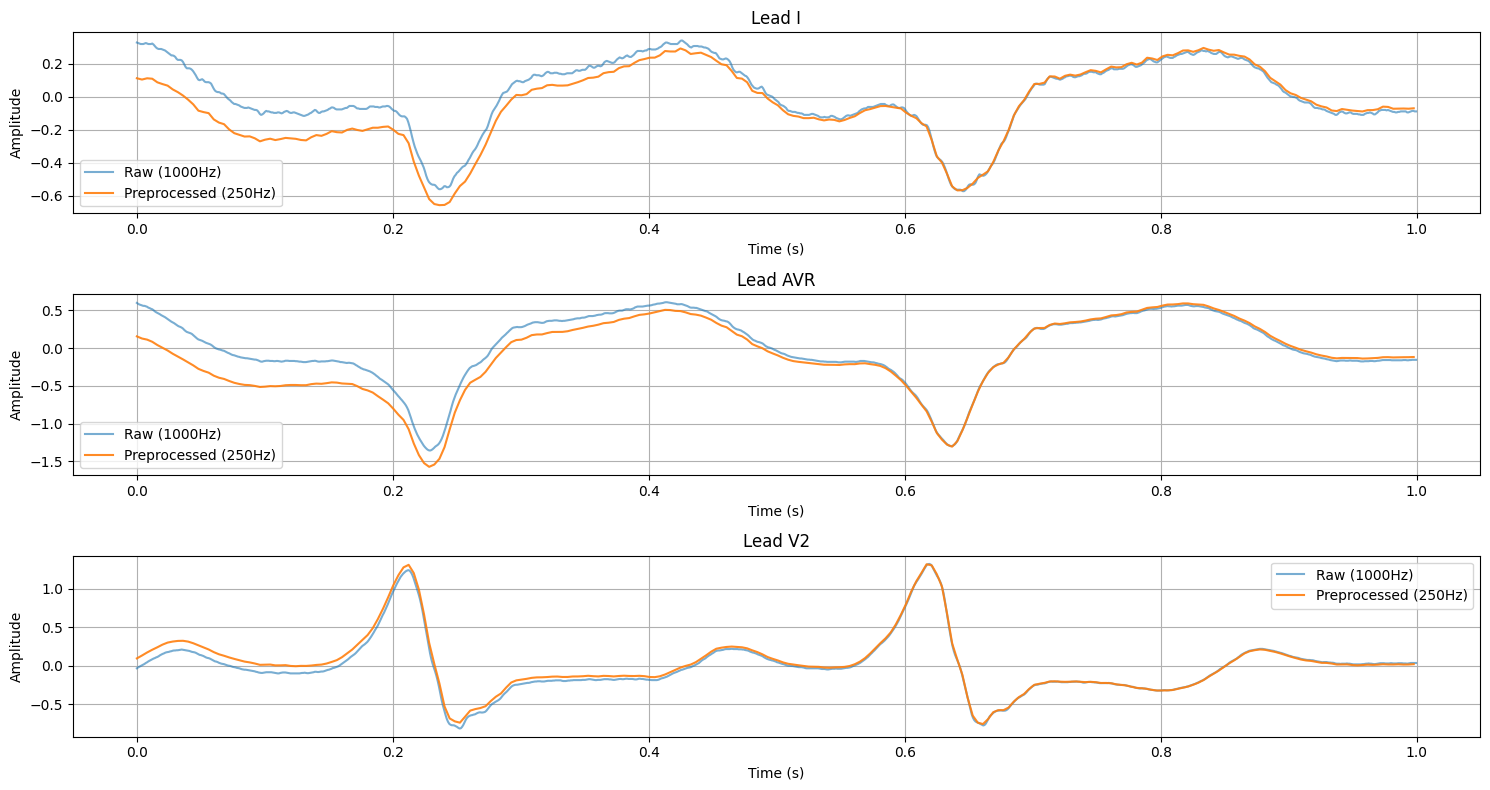

In [11]:
# Compare the raw and preprocessed signals
# Leads that might show more noise or differences after preprocessing
leads_to_plot = ['I', 'AVR', 'V2']
lead_indices = [ecg_leads.index(lead) for lead in leads_to_plot]

# Raw and processed signals
raw_signal = multi_lead_ecgs[i]  # [12, 2500]
if isinstance(preprocessed_ecgs, list):
    processed_signal = preprocessed_ecgs[i].T
else:
    processed_signal = preprocessed_ecgs[i].T  # [12, 625]

# Time axes
t_raw = np.linspace(0, 2.5, raw_signal.shape[1])        # 2500 samples at 1000 Hz
t_processed = np.linspace(0, 2.5, processed_signal.shape[1])  # 625 samples at 250 Hz

# Focus on first second only (for better detail)
max_time = 1.0
raw_mask = t_raw <= max_time
proc_mask = t_processed <= max_time

plt.figure(figsize=(15, 8))

for k, lead_idx in enumerate(lead_indices):
    plt.subplot(len(lead_indices), 1, k+1)
    
    plt.plot(t_raw[raw_mask], raw_signal[lead_idx][raw_mask], label='Raw (1000Hz)', alpha=0.6)
    plt.plot(t_processed[proc_mask], processed_signal[lead_idx][proc_mask], label='Preprocessed (250Hz)', alpha=0.9)
    
    plt.title(f"Lead {ecg_leads[lead_idx]}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# Map SOO to chamber (Left / Right /OTHER)
# Load Hoja1 and Hoja2 from the mapping Excel file
labels_path = "data/labels_FontiersUnsupervised.xlsx"
map_hoja1 = pd.read_excel(labels_path, sheet_name="Hoja1")
map_hoja2 = pd.read_excel(labels_path, sheet_name="Hoja2")

# Build lookup dictionaries
map_1 = dict(zip(map_hoja1["SOO"], map_hoja1["SOO_Chamber"]))
map_2 = dict(zip(map_hoja2["SOO"], map_hoja2["SOO_chamber"]))

# Step 1: Initial mapping using Hoja1
simplified_chambers = []
for entry in full_data["SOO"]:
    if isinstance(entry, str) and entry in map_1:
        simplified_chambers.append(map_1[entry])
    else:
        simplified_chambers.append("OTHER")

# Step 2: Update entries marked as "OTHER" using Hoja2
for i, entry in enumerate(full_data["SOO"]):
    if simplified_chambers[i] == "OTHER" and isinstance(entry, str) and entry in map_2:
        simplified_chambers[i] = map_2[entry]

In [13]:
# Show all unique chamber names after Hoja1 + Hoja2 mapping
unique_chambers = sorted(set(simplified_chambers))
print("Unique chamber labels found:", len(unique_chambers))
for label in unique_chambers:
    print("-", label)

Unique chamber labels found: 8
- Coronary sinus
- LVOT
- Left ventricle
- Mitral annulus
- OTHER
- RVOT
- Right ventricle
- Tricuspid annulus


In [14]:
def normalize_chamber(label):
    """
    Normalize known chamber labels to: 'Left', 'Right', or 'OTHER'
    """
    if label in ["RVOT", "Right ventricle", "Tricuspid annulus", "Coronary sinus"]:
        return "Right"
    elif label in ["LVOT", "Left ventricle", "Mitral annulus"]:
        return "Left"
    return "OTHER"

final_chambers_normalized = [normalize_chamber(c) for c in simplified_chambers]

In [15]:
# Include the final label (Left, Right, OTHER) as a column in our metadata DataFrame
df_meta["normalized_label"] = final_chambers_normalized
print(df_meta.info())

df_clean = df_meta[df_meta["normalized_label"].isin(["Left", "Right"])].copy()
df_clean.info()
print(df_clean["normalized_label"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               179 non-null    object 
 1   HTA               175 non-null    object 
 2   Age               178 non-null    float64
 3   PVC_transition    176 non-null    object 
 4   SOO_chamber       181 non-null    object 
 5   Height            153 non-null    float64
 6   Weight            153 non-null    float64
 7   BMI               99 non-null     float64
 8   DM                174 non-null    object 
 9   DLP               175 non-null    object 
 10  Smoker            173 non-null    object 
 11  COPD              174 non-null    object 
 12  Sleep_apnea       173 non-null    object 
 13  CLINICAL_SCORE    174 non-null    float64
 14  SOO               180 non-null    object 
 15  OTorigin          180 non-null    float64
 16  normalized_label  181 non-null    object 
dt

There are many missing values in different columns, so we must decide how to handle them. Since no columns have more than 40% missing values, we decided to impute them.

In [16]:
# Impute numerical columns (median)
numeric_columns = ["Age", "Height", "Weight", "BMI", "CLINICAL_SCORE"]
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())

# Impute categorical columns (mode)
categorical_columns = ["Sex", "PVC_transition", "HTA", "DM", "DLP", "Smoker", "COPD", "Sleep_apnea", "OTorigin"]
df_clean[categorical_columns] = df_clean[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Map labels to numeric values
df_clean["label"] = df_clean["normalized_label"].map({"Left": 0, "Right": 1})

In [17]:
print(df_clean.info())
df_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 180
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               180 non-null    object 
 1   HTA               180 non-null    object 
 2   Age               180 non-null    float64
 3   PVC_transition    180 non-null    object 
 4   SOO_chamber       180 non-null    object 
 5   Height            180 non-null    float64
 6   Weight            180 non-null    float64
 7   BMI               180 non-null    float64
 8   DM                180 non-null    object 
 9   DLP               180 non-null    object 
 10  Smoker            180 non-null    object 
 11  COPD              180 non-null    object 
 12  Sleep_apnea       180 non-null    object 
 13  CLINICAL_SCORE    180 non-null    float64
 14  SOO               180 non-null    object 
 15  OTorigin          180 non-null    float64
 16  normalized_label  180 non-null    object 
 17  la

,Sex,HTA,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin,normalized_label,label
0,Female,No,61.0,V1,Right ventricle,169.5,75.5,26.562500,No,No,No,No,No,1.0,Unión mitroaórtica,0.0,Right,1
1,Female,No,52.0,V3,RVOT,169.0,68.0,26.562500,No,No,No,No,No,1.0,Pared libre anterior,1.0,Right,1
2,Female,No,69.0,V3,LVOT,156.0,70.0,26.562500,No,Yes,No,No,No,1.0,RCC,1.0,Left,0
3,Female,No,66.0,V4,Right ventricle,176.0,63.0,20.338326,No,No,No,No,No,1.0,M. papilar posteromedial,0.0,Right,1
4,Female,Yes,46.0,V3,RVOT,160.0,79.0,30.859375,No,No,No,No,No,1.0,RVOT septal,1.0,Right,1
5,Male,No,84.0,V3,LVOT,179.0,97.0,30.273712,No,No,No,Yes,No,2.0,Seno de Valsalva izdo.,1.0,Left,0
6,Male,Yes,74.0,V2,LVOT,167.0,89.0,31.912223,No,Yes,No,No,No,3.0,Intersenos dcho.-izdo.,1.0,Left,0
7,Male,Yes,72.0,V2,LVOT,169.5,75.5,26.562500,No,Yes,No,No,No,3.0,LVOT intersenos dcho.-izdo.,1.0,Left,0
8,Female,Yes,62.0,V3,RVOT,152.0,62.0,26.835180,No,No,No,No,No,2.0,RVOT posterolateral,1.0,Right,1
9,Female,No,36.0,V3,RVOT,159.0,80.0,26.562500,No,No,No,No,No,0.0,RVOT,1.0,Right,1


In [18]:
# Extract valid indices
valid_indices = df_clean.index.tolist()
labels = df_clean["label"].values

# Align ECG signals with df_clean
X = [preprocessed_ecgs[i] for i in valid_indices]
y = labels

In [19]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, valid_indices, stratify=y, test_size=0.2, random_state=42)

Training Set:
  Left (0): 32
  Right (1): 112

Test Set:
  Left (0): 8
  Right (1): 28


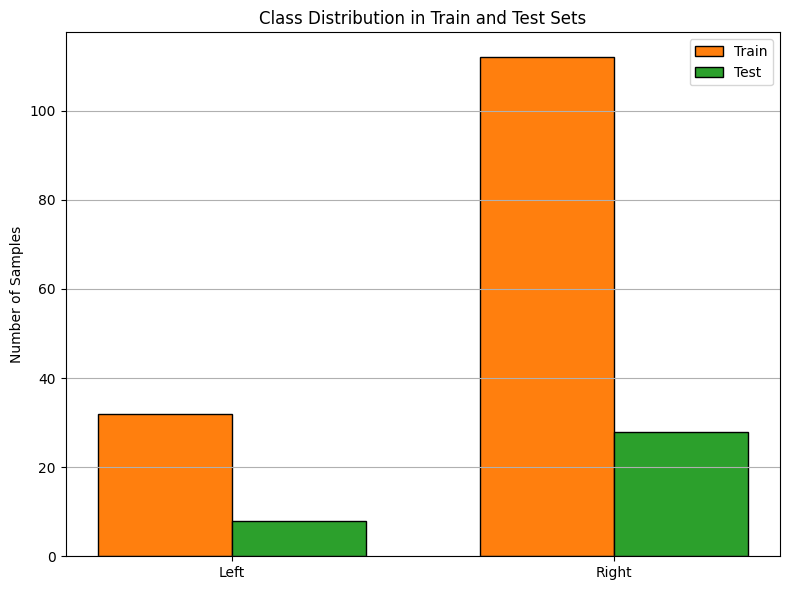

In [20]:
# Count Left and Right labels in train and test sets
left_train = np.sum(y_train == 0)
right_train = np.sum(y_train == 1)
left_test = np.sum(y_test == 0)
right_test = np.sum(y_test == 1)

# Print counts
print("Training Set:")
print("  Left (0):", left_train)
print("  Right (1):", right_train)

print("\nTest Set:")
print("  Left (0):", left_test)
print("  Right (1):", right_test)

# Plot side-by-side bar chart
labels = ["Left", "Right"]
train_counts = [left_train, right_train]
test_counts = [left_test, right_test]

x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, train_counts, width, label='Train', color='tab:orange', edgecolor='black')
plt.bar(x + width/2, test_counts, width, label='Test', color='tab:green', edgecolor='black')

plt.ylabel('Number of Samples')
plt.title('Class Distribution in Train and Test Sets')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The training set contains 32 Left samples vs. 112 Right samples, leading to a strong class imbalance. Without correction, the model may learn to favor the dominant class (Right), harming generalization.

To address this, we apply *ata augmentation to the Left class in the training set using:
* Gaussian noise addition (simulates measurement noise)
* Time shifting (simulates temporal variability)

This generates 2 new synthetic samples per original, helping balance the dataset.

Note that augmentation is applied only on the training set to avoid biasing model evaluation. The test set remains untouched, representing the true performance the model would have on real-world ECGs.

In [21]:
# Data augmentation
import random

def augment_ecg(ecg, noise_level=0.01, shift_range=10):
    """
    Augment an ECG signal by adding noise and shifting the signal.
    Parameters:
    - ecg: The original ECG signal (numpy array).
    - noise_level: The standard deviation of Gaussian noise to add.
    - shift_range: The range within which to shift the signal (in samples).
    Returns:
    - augmented_versions: A list of augmented ECG signals.
    """
    augmented_versions = []

    # 1. Add Gaussian noise (white noise) to simulate sensor or environment noise
    noise = ecg + np.random.normal(0, noise_level, ecg.shape)
    augmented_versions.append(noise)

    # 2. Time shift (circular roll), creating variation in the signal
    shift = random.randint(-shift_range, shift_range)  # Random shift between -shift_range and +shift_range
    shifted = np.roll(ecg, shift, axis=0)
    augmented_versions.append(shifted)

    return augmented_versions

In [22]:
# Augment only the Left-class in training set
X_train_aug = []
y_train_aug = []

for i, ecg in enumerate(X_train):
    label = y_train[i]
    X_train_aug.append(ecg)
    y_train_aug.append(label)

    if label == 0:
        for aug in augment_ecg(ecg):
            X_train_aug.append(aug)
            y_train_aug.append(0)

X_train_aug = np.stack(X_train_aug)
y_train_aug = np.array(y_train_aug)

# Report balance and augmented dataset size
print("\nData Augmentation Complete")
print("X_train_aug shape:", X_train_aug.shape)
print("Left (0):", np.sum(y_train_aug == 0))  # Count how many "Left" samples
print("Right (1):", np.sum(y_train_aug == 1))  # Count how many "Right" samples


Data Augmentation Complete
X_train_aug shape: (208, 625, 12)
Left (0): 96
Right (1): 112


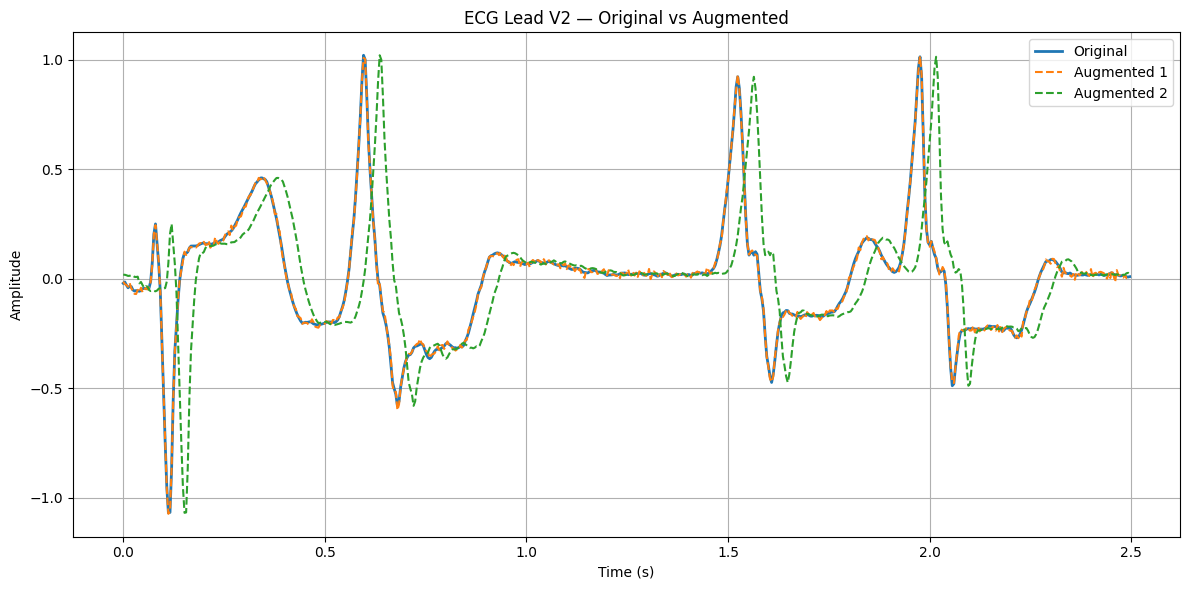

In [23]:
# Visualize one original "Left" sample from the training set and its augmentations (lead V2)

# Find the first Left-class example in the original (pre-augmented) training set
for i, label in enumerate(y_train):
    if label == 0:
        left_example_idx = i
        break

# Extract the original signal
original_signal = X_train[left_example_idx]

# Apply augmentation again (only for visualization)
augmented_signals = augment_ecg(original_signal)

# Plot original and augmented on lead V2 (index 7)
def plot_ecg_comparison(original, augmented, lead=7, fs=250):
    t = np.arange(original.shape[0]) / fs
    plt.figure(figsize=(12, 6))
    plt.plot(t, original[:, lead], label="Original", linewidth=2)
    for i, aug in enumerate(augmented):
        plt.plot(t, aug[:, lead], label=f"Augmented {i+1}", linestyle='--')
    plt.title(f"ECG Lead {ecg_leads[lead]} — Original vs Augmented")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_ecg_comparison(original_signal, augmented_signals)